# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# откроем файл
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# выведем первые 10 строк, проверим, что файл открылся и данные можно прочитать
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# посмотрим общую информацию о нашем наборе данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

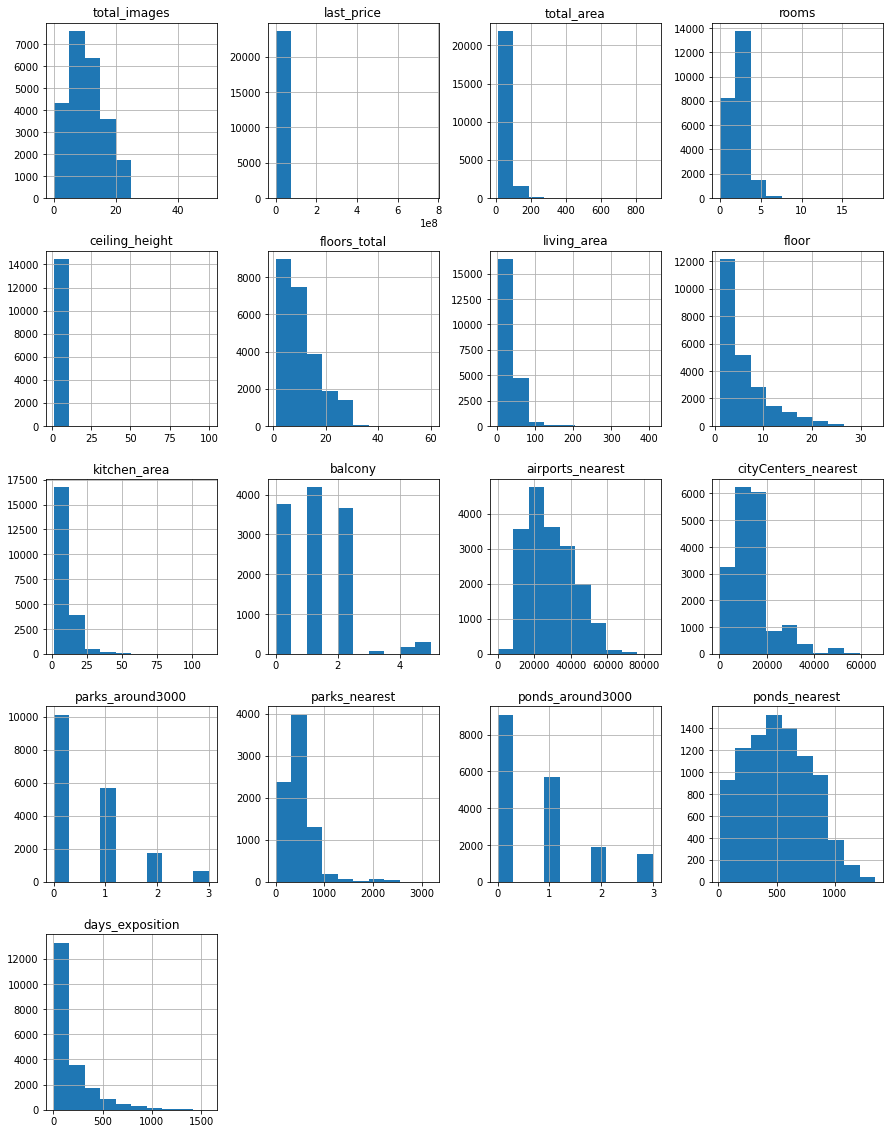

In [5]:
# построим гистограмму для всех столбцов с числовым типом данных
data.hist(figsize=(15, 20));

**Вывод:** некоторые столбцы имеют пропуски и/или не совсем подходящий тип.  
*first_day_exposition* - следует привести к типу datetime  
*ceiling_height* – присутствуют пропуски  
*floors_total* – присутствуют пропуски, следует привести к типу int64  
*living_area* – присутствуют пропуски  
*is_apartment* – присутствуют пропуски, следует привести к типу bool  
*kitchen_area* – присутствуют пропуски  
*balcony* – присутствуют пропуски, следует привести к типу int64  
*locality_name* – присутствуют пропуски  
*airports_nearest* – присутствуют пропуски  
*cityCenters_nearest* – присутствуют пропуски, следует привести название к snake_case  
*parks_around3000* – присутствуют пропуски, следует привести к типу int64  
*parks_nearest* – присутствуют пропуски, следует привести к типу int64  
*ponds_around3000* – присутствуют пропуски, следует привести к типу int64  
*ponds_nearest* – присутствуют пропуски, следует привести к типу int64  
*days_exposition* – присутствуют пропуски

### Предобработка данных

In [8]:
# приведём first_day_exposition к типу datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [9]:
# посмотрим на уникальные значения в столбце floors_total
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [10]:
# рассмотрим те данные, где пропущено значение во столбце floors_total
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Пропущенные значения восстановить не удаётся, оставим, как есть. Возможно, эти значения были пропущены по невнимательности.

In [11]:
# посмотрим на уникальные значения в столбце ceiling_height
sorted(data['ceiling_height'].unique())

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


In [12]:
# посмотрим на квартиры с аномально высокими потолками
data[data['ceiling_height'] >= 20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


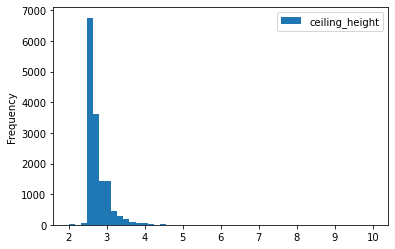

In [13]:
# построим гистограмму
data.plot(y='ceiling_height', bins=50, range=(2, 10), kind='hist');

Поскольку на гистограмме видно, что наибольшее число квартир имеет потолки высотой от 2 до 3 метров, следует предположить, что в аномально большие цифры закралась ошибка с запятой. 

In [14]:
# разделим слишком большие числа на 10
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 10, data['ceiling_height']/10)

In [15]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.728100
std          0.299855
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

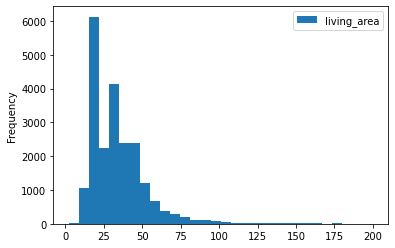

In [16]:
# обратимся к столбцу living_area
data.plot(y='living_area', bins=30, range=(2, 200), kind='hist')

In [17]:
# посчитаем соотношение жилой площади к общей, найдём медиану и заполним пропущенные значения
prc_la = data['living_area'] / data['total_area']
prc_la_median = prc_la.median()

In [18]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * prc_la_median)

In [19]:
# посмотрим на столбец is_apartment
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [20]:
# заполним пропуски значением False
data['is_apartment'] = data['is_apartment'].fillna(False)

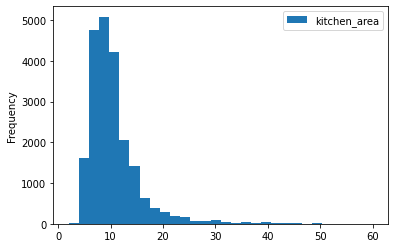

In [21]:
# обратимся к столбцу kitchen_area
data.plot(y='kitchen_area', bins=30, range=(2, 60), kind='hist');

In [22]:
check = data['total_area'] * 0.9 <= data['living_area'] + data['kitchen_area']

In [23]:
check.groupby(check==True).count()

False    23188
True       511
dtype: int64

<AxesSubplot:ylabel='Frequency'>

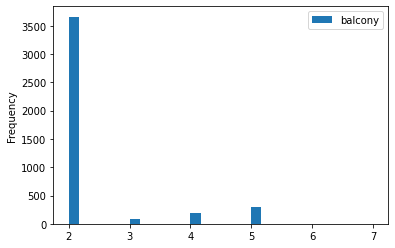

In [25]:
# посмотрим на столбец balcony
data.plot(y='balcony', bins=30, range=(2, 7), kind='hist')

In [26]:
# заполним пропуски 0 и приведём к нужному типу
data['balcony'] = data['balcony'].fillna(0).astype('int64')

In [27]:
# посмотрим на уникальные значения столбца locality_name
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [28]:
for name in data['locality_name'].sort_values().unique()[:-1]:
    if 'поселок' in name:
        print(name)

городской поселок Большая Ижора
городской поселок Янино-1
коттеджный поселок Кивеннапа Север
коттеджный поселок Счастье
поселок Аннино
поселок Барышево
поселок Бугры
поселок Возрождение
поселок Войсковицы
поселок Володарское
поселок Гаврилово
поселок Гарболово
поселок Гладкое
поселок Глажево
поселок Глебычево
поселок Гончарово
поселок Громово
поселок Дружноселье
поселок Елизаветино
поселок Жилгородок
поселок Жилпосёлок
поселок Житково
поселок Заводской
поселок Запорожское
поселок Зимитицы
поселок Ильичёво
поселок Калитино
поселок Каложицы
поселок Кингисеппский
поселок Кирпичное
поселок Кобралово
поселок Кобринское
поселок Коммунары
поселок Коробицыно
поселок Котельский
поселок Красная Долина
поселок Красносельское
поселок Лесное
поселок Лисий Нос
поселок Лукаши
поселок Любань
поселок Мельниково
поселок Мичуринское
поселок Молодцово
поселок Мурино
поселок Новый Свет
поселок Новый Учхоз
поселок Оредеж
поселок Пансионат Зелёный Бор
поселок Первомайское
поселок Перово
поселок Петровское
по

In [29]:
# заменим "поселок" на "посёлок"
data['locality_name'] = data['locality_name'].replace(regex='поселок', value='посёлок')

In [30]:
# заменим "посёлок при железнодорожной станции" на "посёлок станции"
data['locality_name'] = data['locality_name'].replace(regex='посёлок при железнодорожной станции', value='посёлок станции')

In [31]:
# заменим "городской посёлок" на "посёлок городского типа"
data['locality_name'] = data['locality_name'].replace(regex='городской посёлок', value='посёлок городского типа')

In [32]:
# проверим
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [33]:
# check
data.locality_name.nunique()

321

In [34]:
data[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15,3,3.55,5.0,50.800000,2,False,...,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30,3,NaN,4.0,42.600000,2,False,...,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20,1,NaN,24.0,15.600000,3,False,...,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11,2,NaN,24.0,33.100000,21,False,...,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28,2,NaN,5.0,30.800000,5,False,...,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09,2,3.00,8.0,39.620000,7,False,...,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10,3,4.00,4.0,52.300000,3,False,...,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14,3,NaN,7.0,47.132372,6,False,...,NaN,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20,3,NaN,7.0,59.100000,5,False,...,8.30,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29,1,NaN,24.0,20.000000,23,False,...,NaN,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Пропущенные названия восстановить не представляется возможным.

In [35]:
# обратимся к столбцу airports_nearest
len(data[data['airports_nearest'].isna()])

5542

Пропусков довольно много. Есть два пути: если присутствует название района – заполнить расстояние до аэропорта медианным расстоянием до аэропорта для этого района или же оставить, как есть. Оставим, как есть.

In [36]:
# приведём столбец cityCenters_nearest к snake_case
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [37]:
# ппроверим
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [38]:
# обратимся к столбцу city_centers_nearest
len(data[data['city_centers_nearest'].isna()])

5519

Пропусков опять же довольно много. Есть два пути: если присутствует название района – заполнить расстояние до центра города медианным расстоянием до центра для этого района или же оставить, как есть. Оставим, как есть.

In [39]:
# посмотрим на столбец parks_around3000
len(data[data['parks_around3000'].isna()])

5518

Оставим пропуски, как есть.

In [40]:
# воозможно, пропуски связаны с тем, что данные были добавлены в какой-то определённый период
data[data['parks_around3000'].isna()]['first_day_exposition'].min()

Timestamp('2014-12-04 00:00:00')

In [41]:
data[data['parks_around3000'].isna()]['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

С датой добавления пропуски, по всей видимости, не связаны.

In [42]:
# посмотрим на столбец parks_nearest
len(data[data['parks_nearest'].isna()])

15620

Пропусков очень много. Оставляем.

In [43]:
# посмотрим на столбец ponds_around3000
len(data[data['ponds_around3000'].isna()])

5518

Совпадает количество строк в которых пропущены *parks_around3000* и *ponds_around3000*. Возможно, случился какой-то сбой, который не позволил заполнить эти картографические данные.

In [44]:
# посмотрим на столбец ponds_nearest
len(data[data['ponds_nearest'].isna()])

14589

Пропусков очень много. Оставляем.

In [45]:
# посмотрим на столбец days_exposition
len(data[data['days_exposition'].isna()])

3181

In [46]:
# убедимся, что изменения внесены
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [47]:
data = data[data['floors_total'].isna() == False]

In [48]:
# изменим тип floors_total
data['floors_total'] = data['floors_total'].astype('int64')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

In [56]:
data = data[data['rooms'] <= 7]

In [57]:
data = data[(data['total_area'] >= 20) & (data['total_area'] <= 250)]

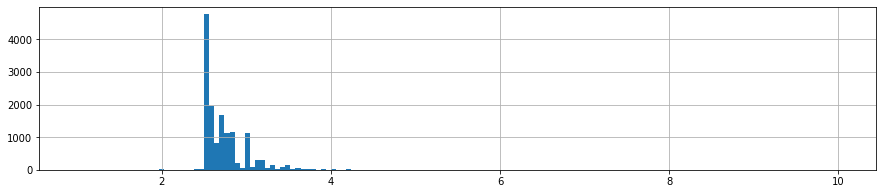

In [60]:
# рассмотрим столбец ceiling_height
data.ceiling_height.hist(bins = 150, figsize = (15,3));

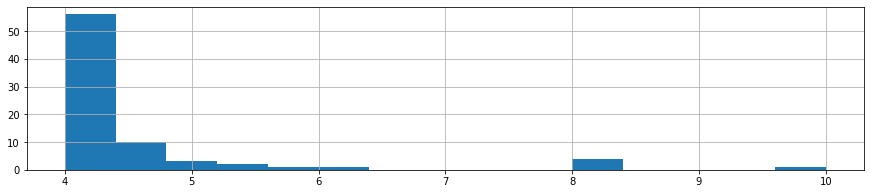

In [61]:
data.ceiling_height.hist(bins = 15, range=(4, 10), figsize = (15,3));

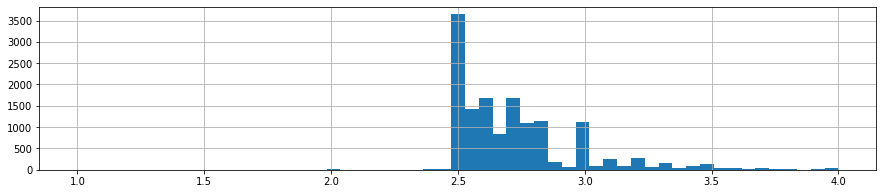

In [62]:
data.ceiling_height.hist(bins = 55, range=(1, 4), figsize = (15,3));

In [63]:
data = data.drop(data[data['ceiling_height'] < 2.2].index)

In [64]:
data = data.drop(data[data['ceiling_height'] > 3.3].index)

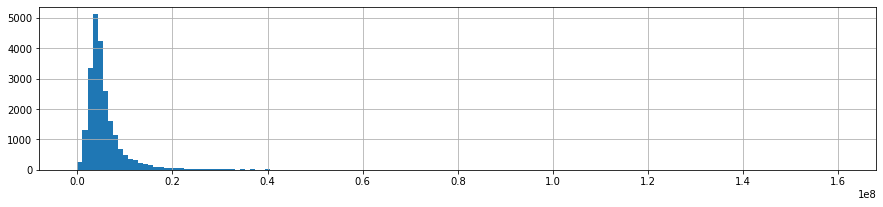

In [65]:
# рассмотрим столбец last_price
data.last_price.hist(bins = 150, figsize = (15,3));

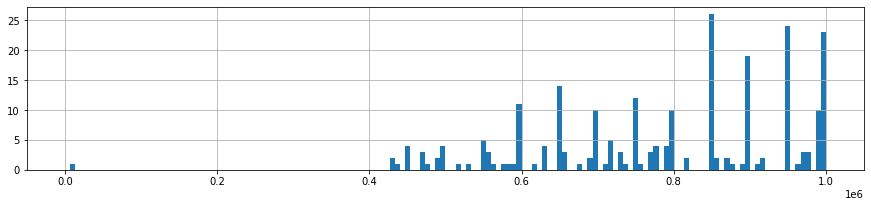

In [66]:
data.last_price.hist(bins = 150, range=(10, 1000000), figsize = (15,3));

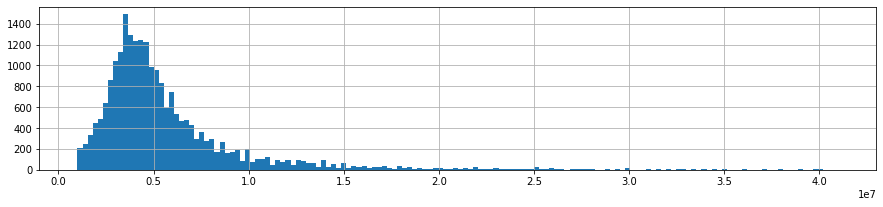

In [67]:
data.last_price.hist(bins = 150, range=(1000000, 41000000), figsize = (15,3));

In [68]:
data = data.drop(data[data['last_price'] > 35000000].index)

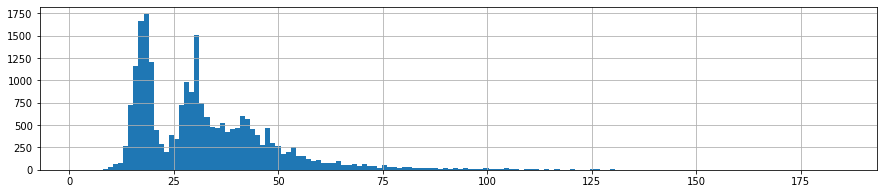

In [69]:
# рассмотрим столбец living_area
data.living_area.hist(bins = 150, figsize = (15,3));

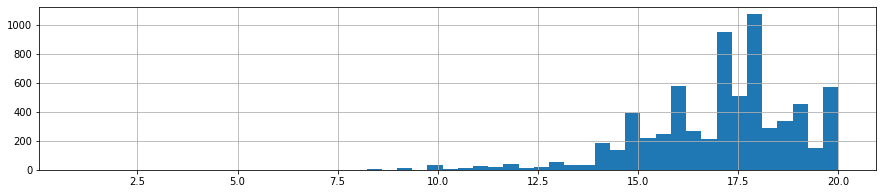

In [70]:
data.living_area.hist(bins = 50, range=(1, 20), figsize = (15,3));

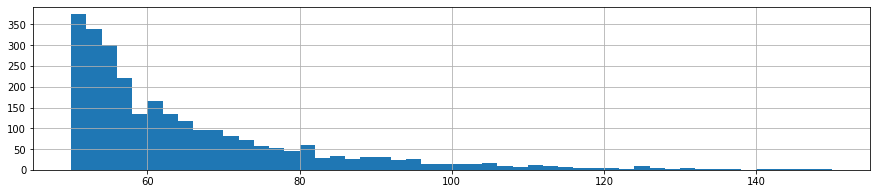

In [71]:
data.living_area.hist(bins = 50, range=(50, 150), figsize = (15,3));

In [72]:
data = data.drop(data[data['living_area'] < 12].index)

In [73]:
data = data.drop(data[data['living_area'] > 120].index)

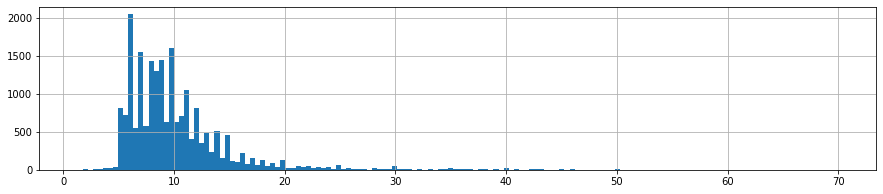

In [74]:
# рассмотрим столбец kitchen_area
data.kitchen_area.hist(bins = 150, figsize = (15,3));

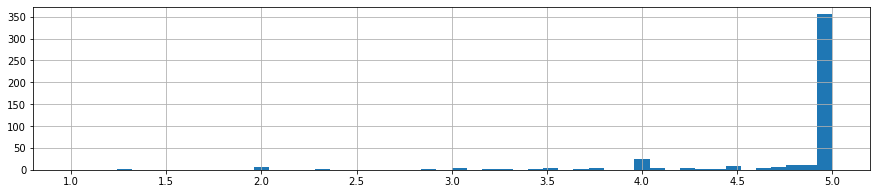

In [75]:
data.kitchen_area.hist(bins = 50, range=(1, 5), figsize = (15,3));

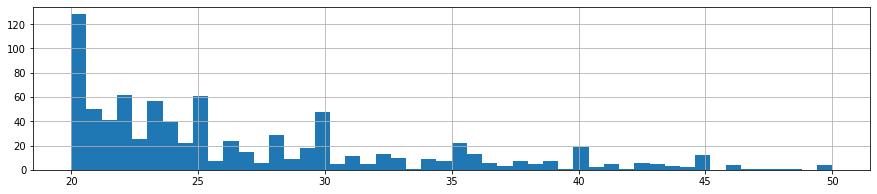

In [76]:
data.kitchen_area.hist(bins = 50, range=(20, 50), figsize = (15,3));

In [77]:
data = data.drop(data[data['kitchen_area'] < 5].index)

In [78]:
data = data.drop(data[data['kitchen_area'] > 30].index)

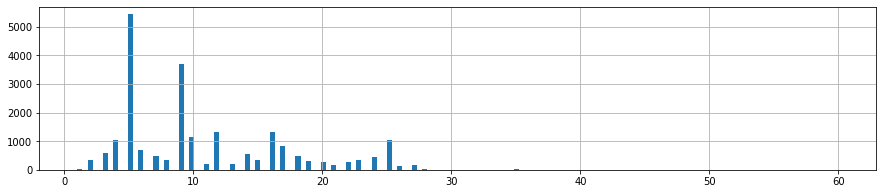

In [79]:
# рассмотрим столбец floors_total
data.floors_total.hist(bins = 150, figsize = (15,3));

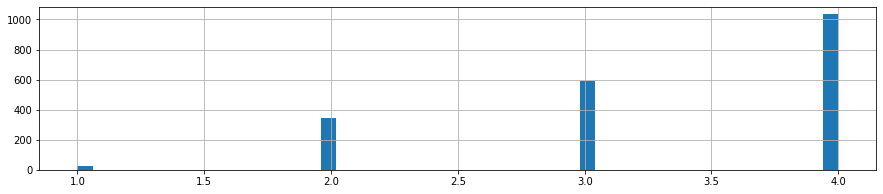

In [80]:
data.floors_total.hist(bins = 50, range=(1, 4), figsize = (15,3));

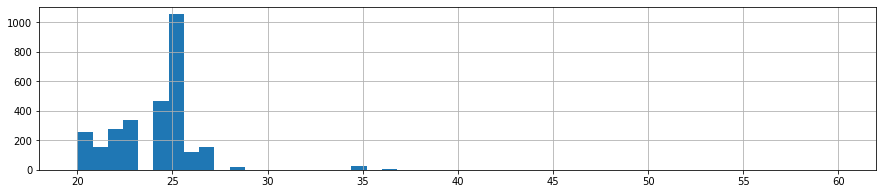

In [81]:
data.floors_total.hist(bins = 50, range=(20, 60), figsize = (15,3));

In [82]:
data = data.drop(data[data['floors_total'] < 3].index)

In [83]:
data = data.drop(data[data['floors_total'] > 30].index)

### Посчитайте и добавьте в таблицу новые столбцы

In [86]:
# добавим столбец для цены за квадратный метр
data['meter_price'] = data['last_price'] / data['total_area']

In [87]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.400000,5,False,...,0,посёлок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,40.658769,22,False,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737


In [88]:
# добавим столбец для дня публикации
data['day_exposition'] = data['first_day_exposition'].dt.weekday

In [89]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,day_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.400000,5,False,...,посёлок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,40.658769,22,False,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3


In [90]:
# добавим столбец для месяца публикации
data['month_exposition'] = data['first_day_exposition'].dt.month

In [91]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,day_exposition,month_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.400000,5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,40.658769,22,False,...,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4


In [92]:
# добавим столбец для года публикации
data['year_exposition'] = data['first_day_exposition'].dt.year

In [93]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.400000,5,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,40.658769,22,False,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019


In [94]:
# напишем функцию для категоризации этажей
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] <= 0:
        return 'ошибка'
    else:
        return 'другой'

In [95]:
data['floor_category'] = data.apply(categorize_floor, axis=1)

In [96]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,day_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.400000,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,40.658769,22,False,...,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой


In [97]:
# переведём расстояние до центра в километры
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

### Проведите исследовательский анализ данных

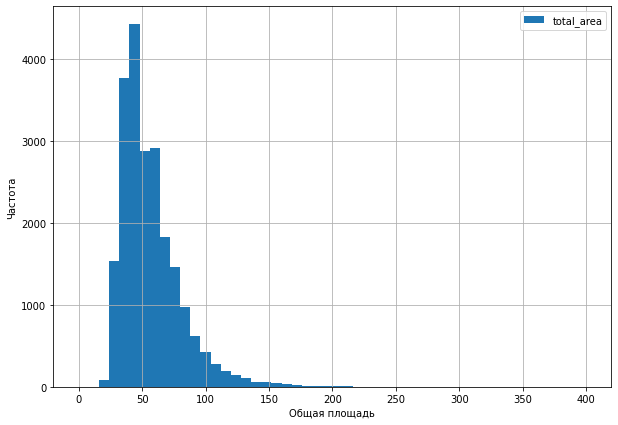

In [98]:
# построим гистограмму для общей площади
ax = data.plot(kind='hist', y='total_area', bins=50, range=(0, 400), grid=True, figsize=(10, 7))
ax.set_xlabel('Общая площадь')
ax.set_ylabel('Частота');

Распределение стремится к нормальному, хотя правый хвост немного длиннее. Большинство квартир имеют общую площадь от 25 до 100 кв. м.

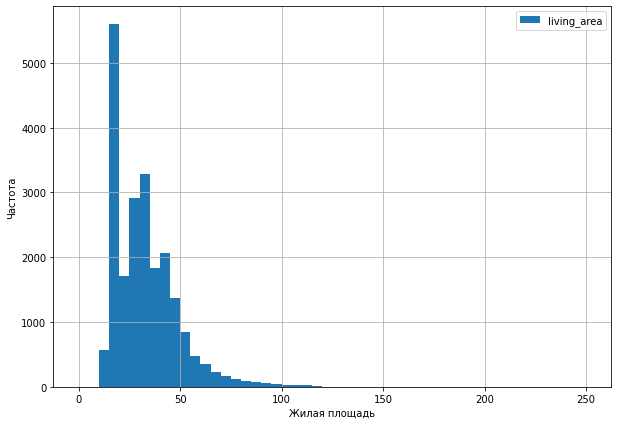

In [99]:
# построим гистограмму для жилой площади
ax = data.plot(kind='hist', y='living_area', bins=50, range=(0, 250), grid=True, figsize=(10, 7))
ax.set_xlabel('Жилая площадь')
ax.set_ylabel('Частота');

Распределение стремится к нормальному, правый хвост немного длиннее. Большинство квартир имеют жилую площадь от 20 до 50 кв. м.

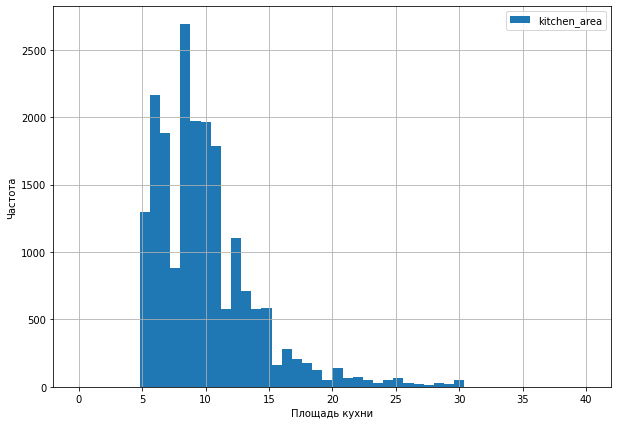

In [100]:
# построим гистограмму для площади кухни
ax = data.plot(kind='hist', y='kitchen_area', bins=50, range=(0, 40), grid=True, figsize=(10, 7))
ax.set_xlabel('Площадь кухни')
ax.set_ylabel('Частота');

Распределение стремится к нормальному, правый хвост немного длиннее. Большинство квартир имеют площадь кухни от 5 до 15 кв. м.

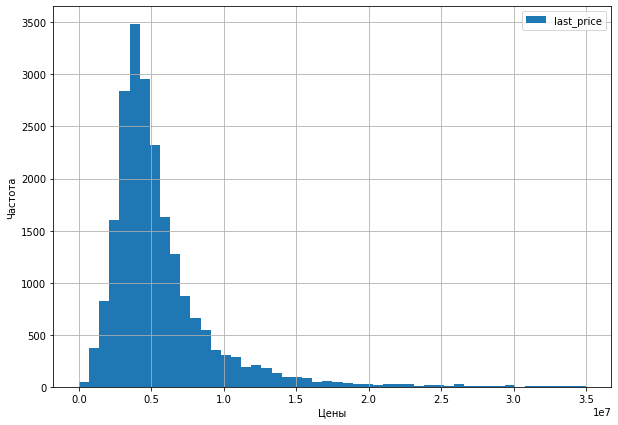

In [101]:
# построим гистограмму для цены
ax = data.plot(kind='hist', y='last_price', range=(0, 35000000), bins=50, grid=True, figsize=(10, 7))
ax.set_xlabel('Цены')
ax.set_ylabel('Частота');

In [102]:
data['last_price'].max()

35000000.0

In [103]:
data['last_price'].min()

430000.0

In [104]:
data['last_price'].median()

4580000.0

In [105]:
data['last_price'].mean()

5566616.75191921

Довольно большая разница между средним и медианой. Распределение стремится к нормальному.

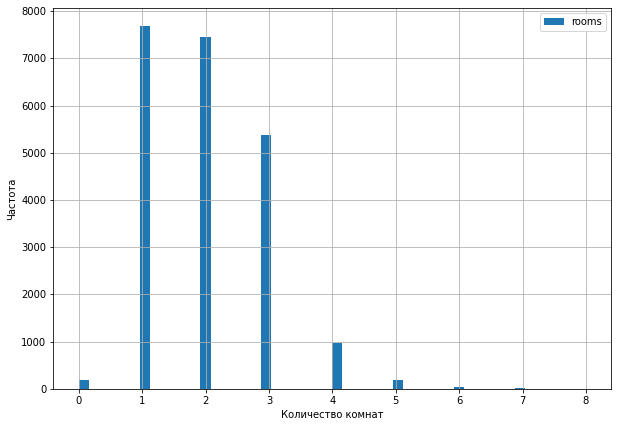

In [106]:
# построим гистограмму для количества комнат
ax = data.plot(kind='hist', y='rooms', range=(0, 8), bins=50, grid=True, figsize=(10, 7))
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Частота');

Чаще встречаются однокомнатные и двухкомнатные квартиры. Встречается значение 0, но, по всей видимости, это квартиры-студии.

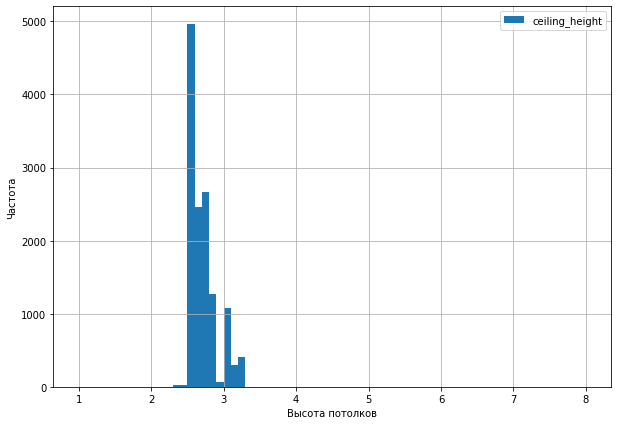

In [107]:
# построим гистограмму для высоты потолков
ax = data.plot(kind='hist', y='ceiling_height', range=(1, 8), bins=70, grid=True, figsize=(10, 7))
ax.set_xlabel('Высота потолков')
ax.set_ylabel('Частота');

Большинство квартир имеют потолки от 2.5 до 3 метров.

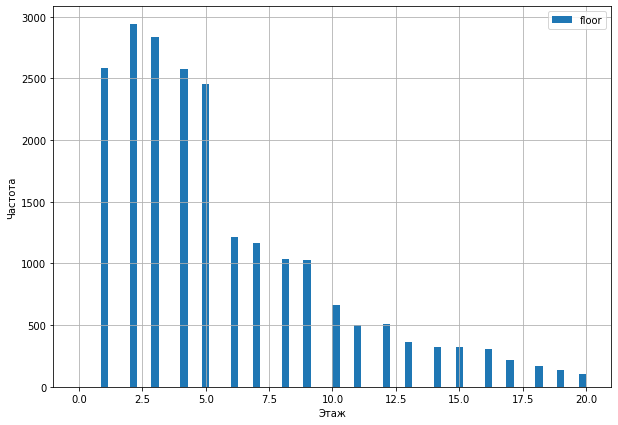

In [108]:
# построим гистограмму для этажей
ax = data.plot(kind='hist', y='floor', range=(0, 20), bins=70, grid=True, figsize=(10, 7))
ax.set_xlabel('Этаж')
ax.set_ylabel('Частота');

Большинство квартир находятся на 2 или 3 этаже.

In [109]:
# построим сводную таблицу для категории этажа
data.pivot_table(index='floor_category', values='last_price', aggfunc='count')

,last_price
floor_category,
другой,16410
первый,2582
последний,2892


Ожидаемо, что на первом и последнем этажах квартир находится меньше.

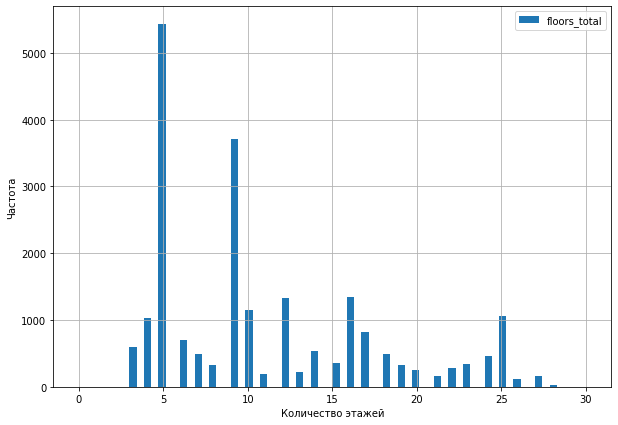

In [110]:
# построим гистограмму для общего количества этажей
ax = data.plot(kind='hist', y='floors_total', range=(0, 30), bins=70, grid=True, figsize=(10, 7))
ax.set_xlabel('Количество этажей')
ax.set_ylabel('Частота');

Основной пик приходится на 5 этаж, следующий поменьше – на 9. Стоит отметить также пиковое значение в районе 25-ого этажа.

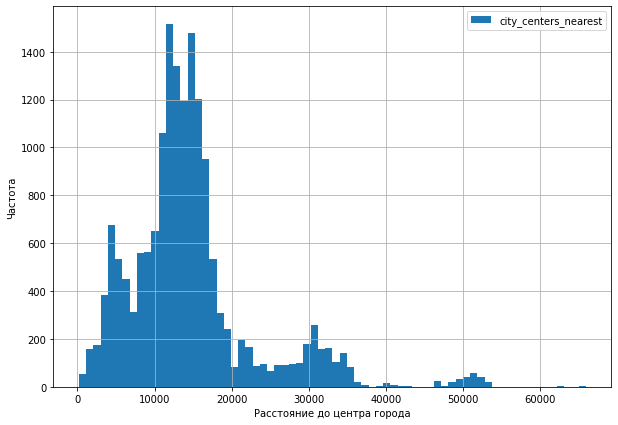

In [111]:
# построим гистограмму для расстояния до центра города
ax = data.plot(kind='hist', y='city_centers_nearest', bins=70, grid=True, figsize=(10, 7))
ax.set_xlabel('Расстояние до центра города')
ax.set_ylabel('Частота');

Большая часть квартир находится на расстоянии от 10000 до 20000 м от центра города. Скорее всего, квартиры в центре, с одной стороны, продают реже, с другой – в самый популярный диапазон попадают новые районы, где строится много многоэтажных домов и, соответственно, много квартир.

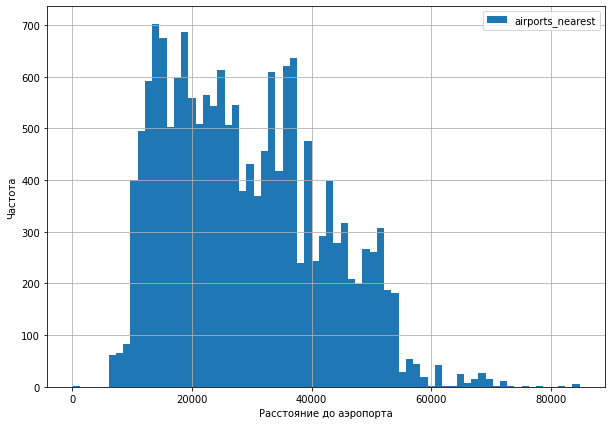

In [112]:
# построим гистограмму для расстояния до аэропорта
ax = data.plot(kind='hist', y='airports_nearest', bins=70, grid=True, figsize=(10, 7))
ax.set_xlabel('Расстояние до аэропорта')
ax.set_ylabel('Частота');

Практически все квартиры, для которых есть соответствующие данные, находятся от аэропорта на расстоянии нескольких километров. 

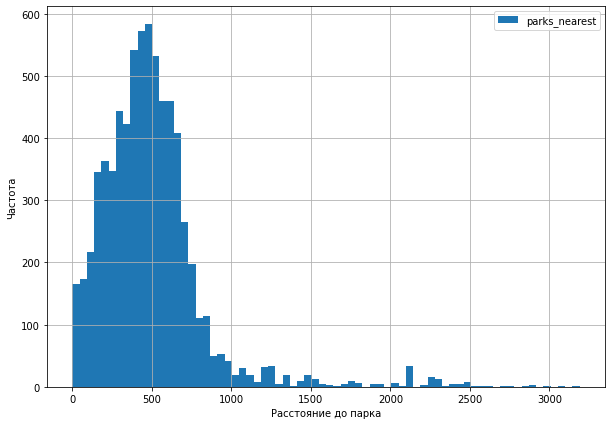

In [113]:
# построим гистограмму для расстояния до парка
ax = data.plot(kind='hist', y='parks_nearest', bins=70, grid=True, figsize=(10, 7))
ax.set_xlabel('Расстояние до парка')
ax.set_ylabel('Частота');

Подавляющее большинство квартир, для которых есть соответствующие данные, находится на расстоянии менее, чем 1000 м, от ближайшего парка. Возможно, это коррелирует с нахождением квартиры в новом районе.

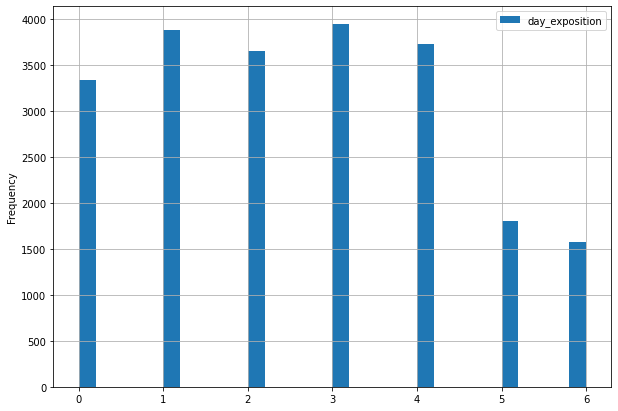

In [114]:
# построим гистограмму для дня публикации
data.plot(kind='hist', y='day_exposition', bins=30, grid=True, figsize=(10, 7))
ax.set_xlabel('День публикации')
ax.set_ylabel('Частота');

Судя по графику, меньше всего публикаций в выходные, что логично. Из будних дней лидер – четверг, меньше всего – в понедельник. Возможно, в первый рабочий день на неделе меньше времени для написания объявлений.

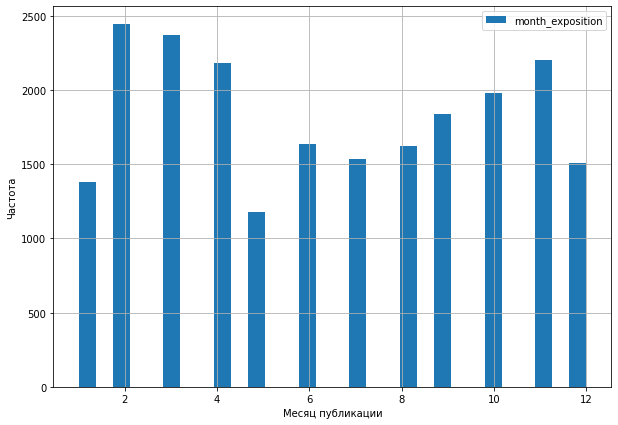

In [115]:
# построим гистограмму для месяца публикации
ax = data.plot(kind='hist', y='month_exposition', bins=30, grid=True, figsize=(10, 7))
ax.set_xlabel('Месяц публикации')
ax.set_ylabel('Частота');

Пик приходится на февраль и март. Меньше всего – в апреле, декабре и январе. Осенью пик в ноябре. Возможно, это как-то связано с окончанием дачного сезона.

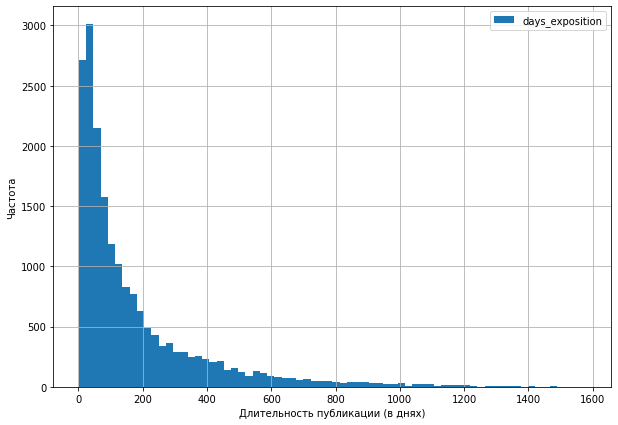

In [116]:
# рассмотрим, как быстро продавались квартиры
ax = data.plot(kind='hist', y='days_exposition', bins=70, grid=True, figsize=(10, 7))
ax.set_xlabel('Длительность публикации (в днях)')
ax.set_ylabel('Частота');

In [117]:
# найдём среднее
data['days_exposition'].mean()

177.03158556387828

In [118]:
# найдём медиану
data['days_exposition'].median()

93.0

In [119]:
data['days_exposition'].describe()

count    19091.000000
mean       177.031586
std        215.649278
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

В большинстве случаев продажа занимает до 200 дней, чаще всего – в районе 93 дней. Быстрыми продажами посчитаем продажу до 44 дней, необычно долгими – после 225 дней.

In [120]:
# построим сводную таблицу для общей площади
pivot_area = data.pivot_table(index='total_area', values='last_price', aggfunc=['median', 'count'])

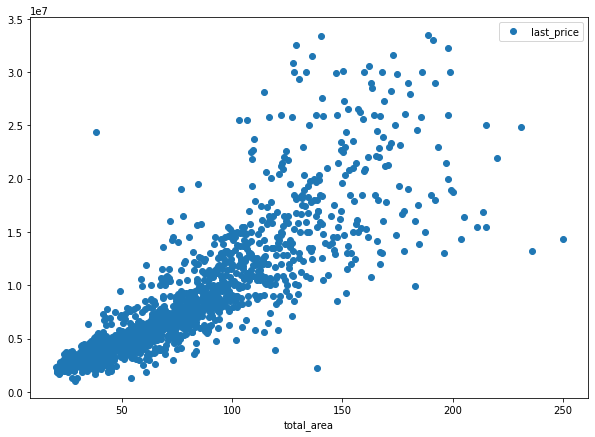

In [121]:
ax = pivot_area.plot(y='median', style='o', figsize=(10, 7));

In [122]:
data['total_area'].corr(data['last_price'])

0.7698862511333983

Между ценой и общей площадью существует достаточно высокая корреляция. Особенно для квартир площадью до 100 кв. м.

In [123]:
# построим сводную таблицу для жилой площади
pivot_living = data.pivot_table(index='living_area', values='last_price', aggfunc=['median', 'count'])

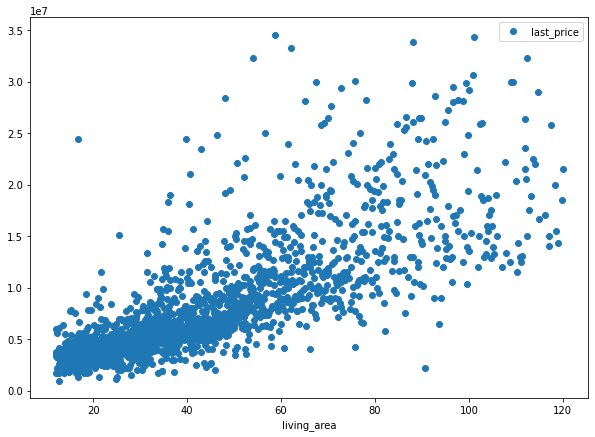

In [124]:
pivot_living.plot(y='median', style='o', figsize=(10, 7));

In [125]:
data['living_area'].corr(data['last_price'])

0.6715522303147057

Некоторая связь между ценой и жилой площадью есть. Но это определённо не главный фактор.

In [126]:
# построим сводную таблицу для площади кухни
pivot_kitchen = data.pivot_table(index='kitchen_area', values='last_price', aggfunc=['median', 'count'])

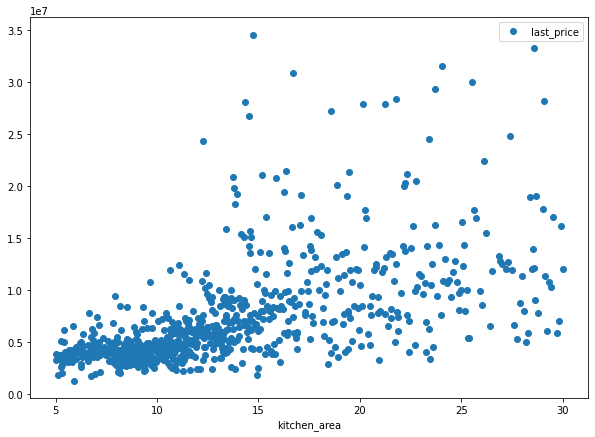

In [127]:
pivot_kitchen.plot(y='median', style='o', figsize=(10, 7));

In [128]:
data['kitchen_area'].corr(data['last_price'])

0.558963597103668

По всей видимости, главный фактор площади при формировании цены – общая площадь квартиры.

In [129]:
# построим сводную таблицу для количества комнат
pivot_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc=['median', 'count'])

In [130]:
pivot_rooms.columns = ['median', 'count']

<AxesSubplot:xlabel='rooms'>

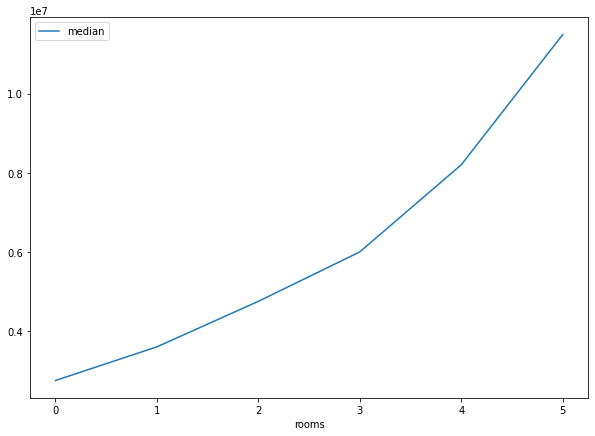

In [131]:
# возьмём такое количество комнат, которое имеет 50 и более квартир
pivot_rooms.query('count > 50').plot(y='median', style='-', figsize=(10, 7));

Судя по графику, чем больше комнат, тем выше цена.

In [132]:
# построим сводную таблицу для категории этажа
pivot_fl_category = data.pivot_table(index='floor_category', values='last_price', aggfunc=['median', 'count'])

In [ ]:
pivot_fl_category.plot(y='median', style='o', figsize=(10, 7));

Видимо, самые дешёвые квартиры – на первом этаже, квартиры на последнем – дороже. На промежуточных этажах ещё дороже. Возможно, это связано с безопасностью (первый этаж близко к улице, а последний не слишком удобен в высотном доме).

In [134]:
# построим сводную таблицу для дня публикации
pivot_day_exposition = data.pivot_table(index='day_exposition', values='last_price', aggfunc=['median', 'count'])

<AxesSubplot:xlabel='day_exposition'>

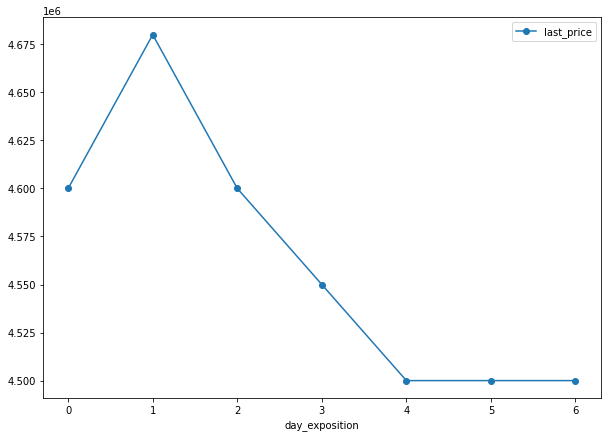

In [135]:
pivot_day_exposition.plot(y='median', style='o-', figsize=(10, 7))

Самые дорогие квартиры опубликованы во вторник. Самые дешёвые – в выходные. Чем ближе к выходным, тем меньше объявлений. Возможно, это говорит о том, что в выходные публикуют объявления те, кому нужно продать квартиру как можно быстрее.

In [136]:
# построим сводную таблицу для месяца публикации
pivot_month_exposition = data.pivot_table(index='month_exposition', values='last_price', aggfunc=['median', 'count'])

<AxesSubplot:xlabel='month_exposition'>

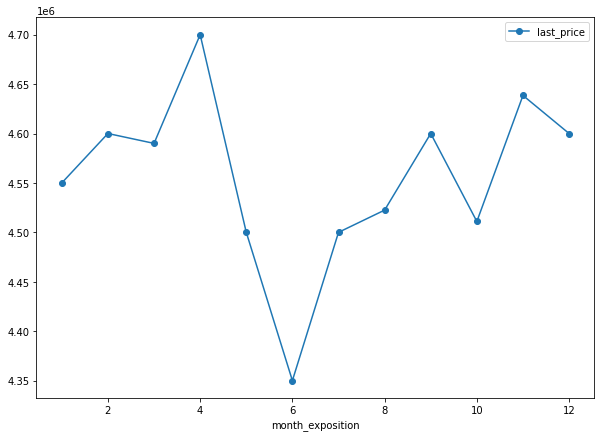

In [137]:
pivot_month_exposition.plot(y='median', style='o-', figsize=(10, 7))

Самые дорогие квартиры опубликованы в апреле, самые дешёвые – в июне. Возможно, те, кто продают в июне, торопятся продать (лето – сезон отпусков).

In [138]:
# построим сводную таблицу для года публикации
pivot_year_exposition = data.pivot_table(index='year_exposition', values='last_price', aggfunc=['median', 'count'])

In [139]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'meter_price', 'day_exposition',
       'month_exposition', 'year_exposition', 'floor_category',
       'city_centers_nearest_km'],
      dtype='object')

In [140]:
data.pivot_table(index='year_exposition', values=['last_price', 'total_area', 'meter_price'], aggfunc=['median', 'count'])

median                                count              \
                last_price    meter_price total_area last_price meter_price   
year_exposition                                                               
2014             6625000.0  103950.412217      74.75        118         118   
2015             5100000.0   91772.151899      58.00       1057        1057   
2016             4450000.0   91234.756098      52.00       2558        2558   
2017             4420000.0   92000.000000      50.70       7565        7565   
2018             4550000.0   95541.401274      50.00       7945        7945   
2019             5000000.0  102841.677943      51.00       2641        2641   

                            
                total_area  
year_exposition             
2014                   118  
2015                  1057  
2016                  2558  
2017                  7565  
2018                  7945  
2019                  2641

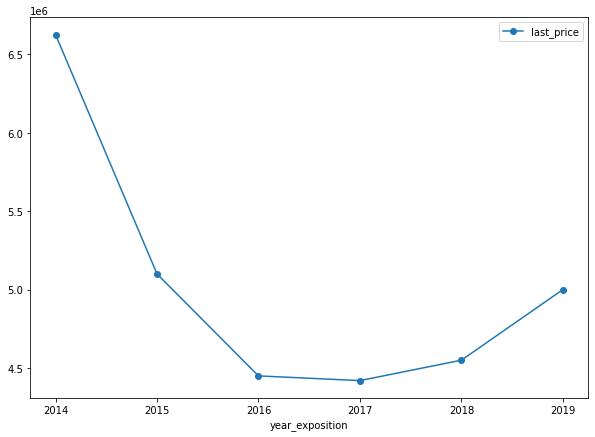

In [141]:
pivot_year_exposition.plot(y='median', style='o-', figsize=(10, 7));

Стоит отметить, что не для всех лет мы располагаем полными данными.
На графике видно, что самые высокие цены были в 2014 году, но при этом данных по этому году меньше всего. Два года с наиболее полными данными показывают, что цена на квадратный метр менялась не очень сильно. В 2019 году слишком мало данных, чтобы судить о том, действительно ли поднялась цена за квадратный метр. По данных тех лет, для которых имеется более 1000 примеров видно, что площадь продаваемых квартир менялась не так сильно, как и цены на них. Для более точных выводов необходимо больше данных для каждого года.

In [142]:
# выберем 10 самых популярных локаций по количеству объявлений
pivot_loc = data.pivot_table(index='locality_name', values='meter_price', aggfunc=['count', 'mean'])

In [143]:
pivot_loc.columns = ['count', 'mean']

In [144]:
top_ten = pivot_loc.sort_values(by='count', ascending=False).head(10)

In [145]:
top_ten.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,14451,109906.087136
Пушкин,340,102242.971969
деревня Кудрово,296,92540.595689
посёлок Парголово,317,90120.789861
посёлок Мурино,539,85331.407021
посёлок Шушары,426,78215.219379
Колпино,336,75359.089340
Гатчина,283,69817.587760
Всеволожск,378,68935.265530


In [146]:
top_ten[top_ten['count'] == top_ten.max()['count']]

,count,mean
locality_name,,
Санкт-Петербург,14451,109906.087136


In [147]:
top_ten[top_ten['count'] == top_ten.min()['count']]

,count,mean
locality_name,,
Выборг,210,58640.587237


[Text(-2.0, 0, 'Санкт-Петербург'),
 Text(0.0, 0, 'посёлок Шушары'),
 Text(2.0, 0, 'Пушкин'),
 Text(4.0, 0, 'посёлок Парголово'),
 Text(6.0, 0, 'Гатчина'),
 Text(8.0, 0, 'Выборг'),
 Text(10.0, 0, 'aa')]

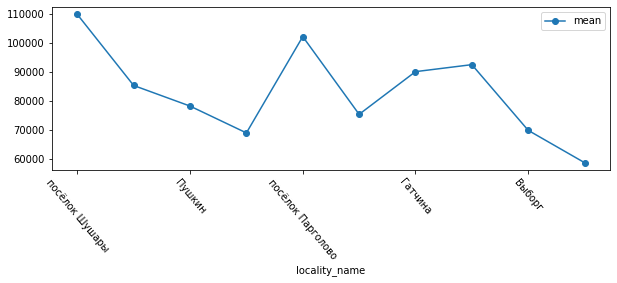

In [148]:
ax = top_ten.plot(y='mean', style='o-', figsize=(10, 3), rot=-50)
ax.set_xticklabels(['Санкт-Петербург', 'посёлок Шушары', 'Пушкин', 'посёлок Парголово', 'Гатчина', 'Выборг', 'aa'])

Самая высокая стоимость квадратного метра – в самом Санкт-Петербурге, самая низкая – в Выборге. Можно предположить, что, чем ближе к городу, тем дороже.

In [149]:
# выделим квартиры в непосредственно СПб в отдельный датасет
data_spb = data[data['locality_name'] == 'Санкт-Петербург']

In [150]:
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,day_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,40.658769,22,False,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,7,False,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.300000,3,False,...,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,14.0


In [151]:
pivot_spb = data_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')

In [152]:
pivot_spb.columns = ['mean']

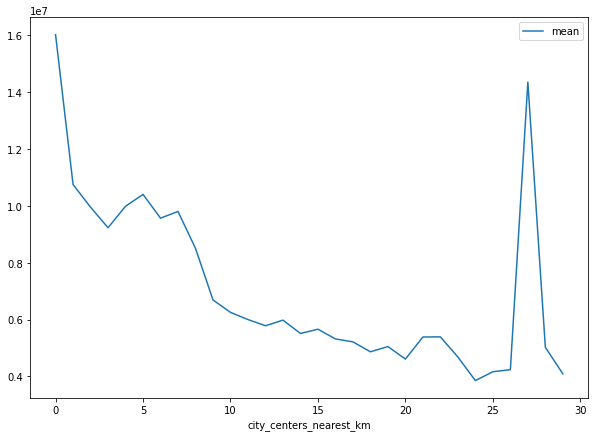

In [153]:
pivot_spb.plot(y='mean', figsize=(10, 7));

In [154]:
data_spb[data_spb['city_centers_nearest_km'] == 27].pivot_table(
    index='floor_category', values=['last_price', 'total_area'], aggfunc=['median', 'count'])

median                 count           
                last_price total_area last_price total_area
floor_category                                             
другой          14350000.0       74.0          1          1

In [155]:
data_spb[data_spb['city_centers_nearest_km'] == 3].pivot_table(
    index='floor_category', values=['last_price', 'total_area'], aggfunc=['median', 'count'])

median                 count           
               last_price total_area last_price total_area
floor_category                                            
другой          8419000.0       79.0        150        150
первый          5500000.0       60.0         44         44
последний       8225000.0       82.5         62         62

In [156]:
data_spb[data_spb['city_centers_nearest_km'] == 6].pivot_table(
    index='floor_category', values=['last_price', 'total_area'], aggfunc=['median', 'count'])

median                 count           
               last_price total_area last_price total_area
floor_category                                            
другой          8500000.0      67.55        374        374
первый          5475000.0      47.85         56         56
последний       6549500.0      63.45         64         64

В целом, чем ближе к центру, тем дороже. Отдельные пики наблюдаются в районе 6 и 27 км (одна очень дорогая квартира). 
На 3-м километре больше доля квартир на первом и последнем этажах (более дешёвых), чем на 6-м.

### Общий вывод

В наборе данных, посвящённом объявлениям о продаже квартир в Санкт-Петербурге, были проанализированы выбросы, исправлены типы данных в некоторых столбцах, устранены неявные дубликаты в названиях, добавлены новые столбцы. Было установлено, что большинство квартир имеют общую площадь от 25 до 100 кв. м, жилую площадь от 20 до 50 кв. м, площадь кухни от 5 до 15 кв. м. Чаще встречаются однокомнатные и двухкомнатные квартиры. Потолки в большинстве квартир имеют высоту от 2.5 до 3 метров. Большинство квартир находятся на 2 или 3 этаже. Большая часть квартир находится на расстоянии от 10000 до 20000 м от центра города. Рядом с большинством квартир находится парк. Объявления о продаже чаще всего публикуют в четверг, реже всего – в выходные. Что касается месяца, то пик приходится на февраль и март. Меньше всего – в апреле, декабре и январе. В большинстве случаев продажа занимает до 200 дней. На цену квартиры влияет количество комнат, близость к центру города, локация и, несколько меньше, общая площадь квартиры. Стоит отметить, что не для всех лет мы располагаем полными данными, поэтому нельзя с полной уверенностью судить о динамике цен.Например, на графике видно, что самые высокие цены были в 2014 году, но при этом данных по этому году меньше всего. Два года с наиболее полными данными показывают, что цена на квадратный метр менялась не очень сильно. В 2019 году слишком мало данных, чтобы судить о том, действительно ли поднялась цена за квадратный метр. По данных тех лет, для которых имеется более 1000 примеров видно, что площадь продаваемых квартир менялась не так сильно, как и цены на них. Для более точных выводов необходимо больше данных для каждого года.